In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./gender_submission.csv")

In [4]:
len(data)

418

In [5]:
data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
train = pd.read_csv("./train.csv")
train

#required to build the model -> survived(y) | Pclass(I),sex(I),SibSp(I),Parch(I),Embarked(I),cabin(I)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
category = train.select_dtypes(include="object").columns

In [11]:
for i in category:
    print(i)

Name
Sex
Ticket
Cabin
Embarked


In [12]:
for i in category:
    print(train[i].unique())

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

<Axes: xlabel='Survived', ylabel='count'>

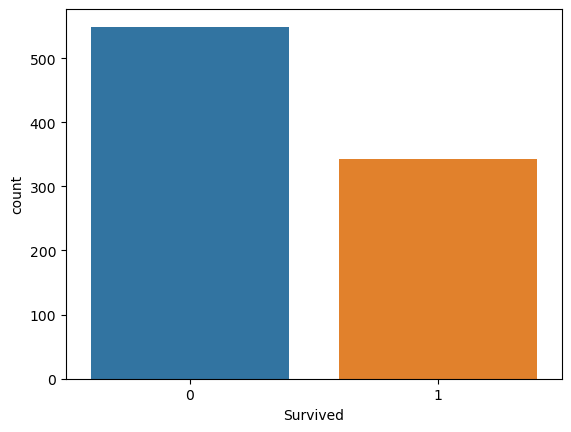

In [13]:
sns.countplot(x="Survived",data=train)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
train["Sex"]=le.fit_transform(train["Sex"])

In [15]:
list(le.classes_)

['female', 'male']

In [16]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [17]:
Survived_count = ((train["Sex"]==0) & (train["Survived"] == 1)).value_counts()
Survived_count


False    658
True     233
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

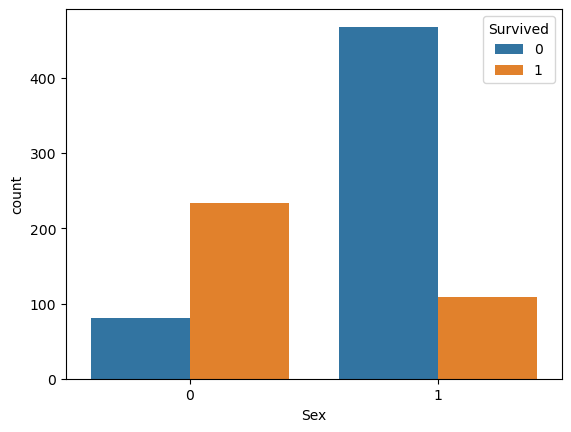

In [18]:
sns.countplot(x=train["Sex"],hue=train["Survived"])

C:\Users\vijay\AppData\Local\Temp\ipykernel_12264\2315444882.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap="YlGnBu")


<Axes: >

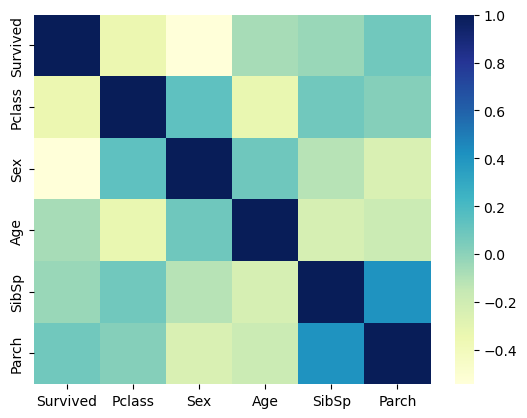

In [117]:
sns.heatmap(train.corr(),cmap="YlGnBu")

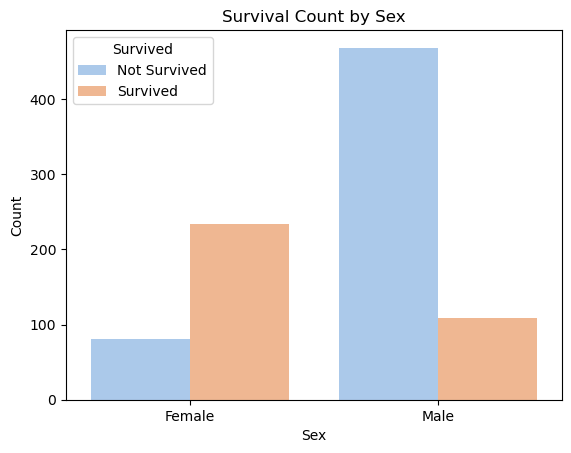

In [19]:
sns.countplot(x="Sex", hue="Survived", data=train, palette="pastel")

# Customize the x-axis labels
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


Survived    0    1
Sex               
0          81  233
1         468  109


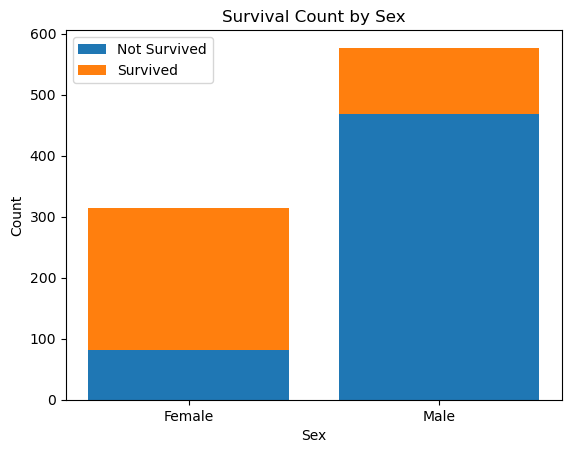

In [20]:
survived_count = train.groupby(['Sex', 'Survived']).size().unstack()

print(survived_count)
x_labels = ['Female','Male']
y_values_not_survived = survived_count[0]
y_values_survived = survived_count[1]

fig, ax = plt.subplots()

ax.bar(x_labels, y_values_not_survived, label='Not Survived')
ax.bar(x_labels, y_values_survived, bottom=y_values_not_survived, label='Survived')

ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Survival Count by Sex')
ax.legend()

plt.show()

In [21]:
train["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [22]:
list(le.classes_)

['female', 'male']

In [23]:
le.classes_[0]

'female'

In [24]:
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

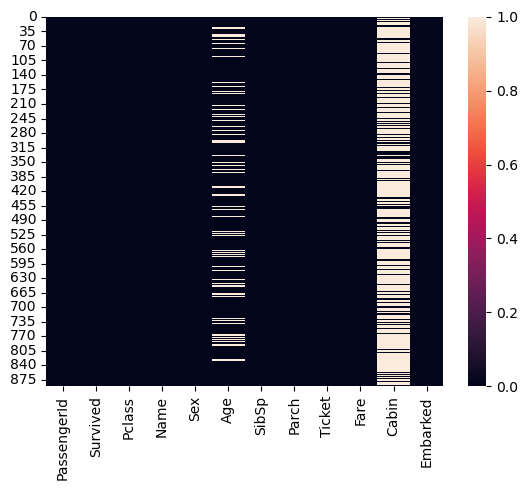

In [26]:
sns.heatmap(train.isna())

In [27]:
train["Age"].isna().sum()/len(train["Age"])*100

19.865319865319865

In [28]:
train["Cabin"].isna().sum()/len(train["Cabin"])*100

77.10437710437711

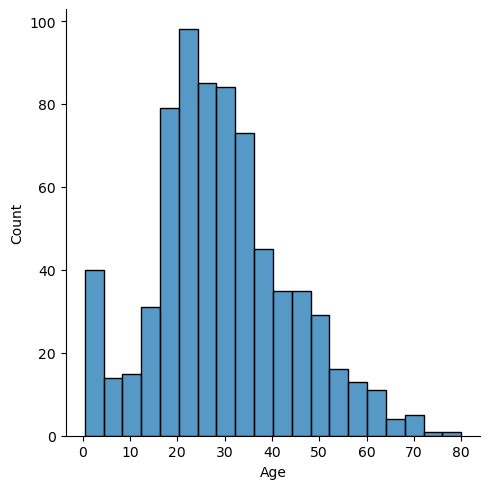

In [29]:
sns.displot(x="Age",data=train)

In [30]:
train["Age"].mean()

29.69911764705882

In [31]:
train["Age"].fillna(train["Age"].mean(),inplace=True)

In [32]:
train["Age"].isna().sum()

0

In [33]:
train.drop('Cabin',axis=1)
train.drop('Name',axis=1)
train.drop('Embarked',axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148


In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.drop(['PassengerId','Ticket','Fare','Name'],axis=1,inplace=True)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,NaN,S
1,1,1,0,38.0,1,0,C85,C
2,1,3,0,26.0,0,0,NaN,S
3,1,1,0,35.0,1,0,C123,S
4,0,3,1,35.0,0,0,NaN,S


In [37]:
y=train['Survived']

In [38]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [39]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,22.0,1,0,NaN,S
1,1,1,0,38.0,1,0,C85,C
2,1,3,0,26.0,0,0,NaN,S
3,1,1,0,35.0,1,0,C123,S
4,0,3,1,35.0,0,0,NaN,S


In [40]:
x = train.drop(['Survived','Cabin','Embarked'],axis=1)

In [41]:
x.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.0,1,0
1,1,0,38.0,1,0
2,3,0,26.0,0,0
3,1,0,35.0,1,0
4,3,1,35.0,0,0


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr=LogisticRegression()

In [46]:
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
predict = lr.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=["Predicted No","Predicted yes"],index=["Actual No","Actual Yes"])

,Predicted No,Predicted yes
Actual No,158,17
Actual Yes,33,87


In [50]:
from sklearn.metrics import r2_score 
print(r2_score(predict,y_test)*100)

#the accuracy is low because R2_Score works only with linear Regression !! , In this case we have used Logistic Regression

25.745066451872734


In [51]:
print("the accuracy is low because R2_Score works only with linear Regression !! , In this case we have used Logistic Regression")

the accuracy is low because R2_Score works only with linear Regression !! , In this case we have used Logistic Regression


In [52]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predict)
print( "accuracy % -> "  ,accuracy*100)

accuracy % ->  83.05084745762711


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       175
           1       0.84      0.72      0.78       120

    accuracy                           0.83       295
   macro avg       0.83      0.81      0.82       295
weighted avg       0.83      0.83      0.83       295



In [54]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
model.fit(x,y)

RandomForestRegressor(random_state=0)

In [55]:
model.predict(x_test)

array([0.86      , 0.40195238, 0.0891087 , 1.        , 0.74      ,
       0.91833333, 0.73026786, 0.01967857, 0.98      , 1.        ,
       0.21833333, 0.356     , 0.06      , 0.14999747, 0.        ,
       1.        , 0.5015    , 0.73026786, 0.006     , 0.        ,
       0.1548565 , 0.7       , 0.62875   , 0.0891087 , 0.08161802,
       0.03      , 0.34633333, 0.40195238, 0.1       , 0.49871429,
       0.08607569, 0.63090657, 0.23543549, 0.73026786, 0.19381421,
       0.21985317, 0.633     , 0.73026786, 1.        , 0.08161802,
       0.03      , 0.0845873 , 0.08161802, 0.08161802, 0.01      ,
       0.00833333, 0.08607569, 0.        , 0.1548565 , 0.05666667,
       0.9       , 0.99      , 0.        , 0.94      , 0.07      ,
       1.        , 0.20933188, 0.84      , 1.        , 0.87167063,
       0.08224283, 1.        , 0.995     , 0.23543549, 0.08161802,
       0.33      , 0.04175656, 0.38869913, 0.01      , 0.98      ,
       0.29166667, 1.        , 0.95      , 1.        , 0.     

In [56]:
from sklearn.metrics import r2_score 
print(r2_score(model.predict(x_test),y_test)*100)

63.370799562935645


In [57]:
print("The accuracy is pretty bad because , Random Forest model typically used for regression tasks, where the target variable is continuous. In our case the output is 0 or 1 ie survived or dead")

The accuracy is pretty bad because , Random Forest model typically used for regression tasks, where the target variable is continuous. In our case the output is 0 or 1 ie survived or dead


In [78]:
test = pd.read_csv("./test.csv")

In [79]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [80]:
test.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Fare'],axis=1,inplace=True)

In [82]:
x=test

In [83]:
x.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [92]:
test["Sex"]=le.fit_transform(test["Sex"])

In [93]:
x.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1


In [96]:
test.isna().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
dtype: int64

In [102]:
test["Age"].fillna(test["Age"].mean(),inplace=True)

In [103]:
predict = lr.predict(x)

In [116]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(predict,y[55:473])
print( "accuracy % -> "  ,accuracy*100)

accuracy % ->  57.17703349282297
